# Load Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
#nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4','vader_lexicon'])

In [2]:
# load data
df = pd.read_csv("export_movie.csv")

In [3]:
# look at two samples
df.sample(2)

,Unnamed: 0,asin,product name,ratings,reviews,helpful,date,Unnamed: 6,target,text
2601,2601,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,\n\n Only the first 2 movies worked fully.\n\n,1,6-Jan-19,NaN,p,\n\n Only the first 2 movies worked fully.\n\n
2002,2002,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,\n\n I have been a Harry Potter fan from the ...,0,17-Apr-14,NaN,p,\n\n I have been a Harry Potter fan from the ...


In [4]:
# check if text and reviews columns are the same
df[df["text"] == df["reviews"]]

,Unnamed: 0,asin,product name,ratings,reviews,helpful,date,Unnamed: 6,target,text
0,0,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,"\n\n When I purchased this set, there were 3 ...","1,322",19-Dec-17,NaN,p,"\n\n When I purchased this set, there were 3 ..."
1,1,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,\n\n I really wish Amazon kept all the review...,439,30-Dec-17,NaN,p,\n\n I really wish Amazon kept all the review...
2,2,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,3,\n\n *** UPDATE *** I returned this very disa...,358,16-Feb-18,NaN,n,\n\n *** UPDATE *** I returned this very disa...
3,3,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,"\n\n This review is about the set, not the mo...",292,26-Nov-17,NaN,p,"\n\n This review is about the set, not the mo..."
4,4,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,3,\n\n Got this last year for my mom for Christ...,394,30-Dec-17,NaN,n,\n\n Got this last year for my mom for Christ...
...,...,...,...,...,...,...,...,...,...,...
4995,4995,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,\n\n Great Movies\n\n,0,14-Apr-20,NaN,p,\n\n Great Movies\n\n
4996,4996,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,4,"\n\n First of all, I'm a huge Harry Potter fa...",0,4-May-12,NaN,p,"\n\n First of all, I'm a huge Harry Potter fa..."
4997,4997,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,\n\n No issues.\n\n,0,21-Feb-20,NaN,p,\n\n No issues.\n\n
4998,4998,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,\n\n Best purchase I ever made I love this se...,0,11-Oct-18,NaN,p,\n\n Best purchase I ever made I love this se...


In [5]:
df.asin.value_counts()

B005OCFGTO    5000
Name: asin, dtype: int64

reviews and text columns have the same data

In [6]:
# check the number of rows and columns
df.shape

(5000, 10)

In [7]:
# display the name of the columns
df.columns

Index(['Unnamed: 0', 'asin', 'product name', 'ratings', 'reviews', 'helpful',
       'date', 'Unnamed: 6', 'target', 'text'],
      dtype='object')

In [8]:
# dsiplay information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5000 non-null   int64  
 1   asin          5000 non-null   object 
 2   product name  5000 non-null   object 
 3   ratings       5000 non-null   int64  
 4   reviews       5000 non-null   object 
 5   helpful       5000 non-null   object 
 6   date          5000 non-null   object 
 7   Unnamed: 6    0 non-null      float64
 8   target        5000 non-null   object 
 9   text          5000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 390.8+ KB


In [9]:
# Explore target variable
df.target.value_counts()

p    3625
n    1375
Name: target, dtype: int64

There are 3625 positve reviews and 1375 negative reviews. The data is not balance.

In [10]:
# stop words
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [11]:
# A function to process data
def preprocess_text(text):
    tokenized_document = nltk.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) # tokenize
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove stop words
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] # stemming
    return stemmed_text

In [12]:
print("\n All data Labels")
print(df.target.value_counts())


 All data Labels
p    3625
n    1375
Name: target, dtype: int64


The data is not balance

In [13]:
# preprocess reviews column
df["reviews"] = df["reviews"].apply(preprocess_text)
df.head()

,Unnamed: 0,asin,product name,ratings,reviews,helpful,date,Unnamed: 6,target,text
0,0,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,"[purchas, set, 3, option, harri, potter, 8, fi...","1,322",19-Dec-17,NaN,p,"\n\n When I purchased this set, there were 3 ..."
1,1,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,"[realli, wish, amazon, kept, review, separ, fo...",439,30-Dec-17,NaN,p,\n\n I really wish Amazon kept all the review...
2,2,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,3,"[updat, return, disappoint, set, dvd', receiv,...",358,16-Feb-18,NaN,n,\n\n *** UPDATE *** I returned this very disa...
3,3,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,"[review, set, movi, either, like, harri, potte...",292,26-Nov-17,NaN,p,"\n\n This review is about the set, not the mo..."
4,4,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,3,"[got, last, year, mom, christma, hp, fan, took...",394,30-Dec-17,NaN,n,\n\n Got this last year for my mom for Christ...


In [14]:
# Create Term frequency matrix using Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["reviews"].map("".join))
X = pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5716,5717,5718,5719,5720,5721,5722,5723,5724,5725
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# split data into training and test set
from sklearn.model_selection import train_test_split

y = df["target"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

### 1. USING UNDERSAMPLING

In [16]:
from imblearn.under_sampling import RandomUnderSampler

In [17]:
# create a balance dataset using undersampling technique
resampler = RandomUnderSampler(random_state=0)
xtrain_under, ytrain_under = resampler.fit_resample(xtrain, ytrain)

<AxesSubplot:xlabel='target', ylabel='count'>

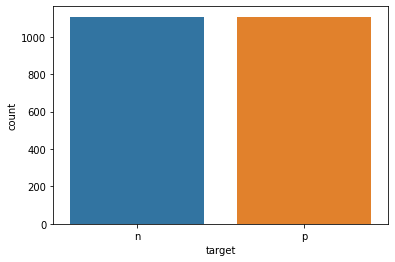

In [18]:
# Coutplot of balance dataset
sns.countplot(x=ytrain_under)

#### A. Naive Bayes using undersampling

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
# Create a Naive Bayes model
model = MultinomialNB()
# Train the model
model.fit(xtrain_under, ytrain_under)

MultinomialNB()

In [21]:
# make predictions with the test set
ypred = model.predict(xtest)

In [22]:
# Compute the accuracy and confusion matrix
from sklearn import metrics
accuracy = metrics.accuracy_score(ytest, ypred)
print("Accuracy:%.2f\n\n"%(accuracy))
cm = metrics.confusion_matrix(ytest, ypred)
print("Confusion Matrix:")
print(cm, "\n\n")
print("-------------------------------------")
result = metrics.classification_report(ytest, ypred)
print("Classification Reort:\n",)
print(result)

Accuracy:0.72


Confusion Matrix:
[[  5 263]
 [ 17 715]] 


-------------------------------------
Classification Reort:

              precision    recall  f1-score   support

           n       0.23      0.02      0.03       268
           p       0.73      0.98      0.84       732

    accuracy                           0.72      1000
   macro avg       0.48      0.50      0.44      1000
weighted avg       0.60      0.72      0.62      1000



#### B. Decision Tree Classifier using undersampling

In [23]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
# Instantiate Decision Tree Classifier
dtc = DecisionTreeClassifier()

In [29]:
# Train decision tree with undersample data
dtc.fit(xtrain_under, ytrain_under)

DecisionTreeClassifier()

In [30]:
# make prediction with undersample test set
dtcpred = dtc.predict(xtest)

In [31]:
# Compute the accuracy and confusion matrix
from sklearn import metrics
accuracy = metrics.accuracy_score(ytest, dtcpred)
print("Accuracy:%.2f\n\n"%(accuracy))
cm = metrics.confusion_matrix(ytest, dtcpred)
print("Confusion Matrix:")
print(cm, "\n\n")
print("-------------------------------------")
result = metrics.classification_report(ytest, dtcpred)
print("Classification Reort:\n",)
print(result)

Accuracy:0.72


Confusion Matrix:
[[  5 263]
 [ 15 717]] 


-------------------------------------
Classification Reort:

              precision    recall  f1-score   support

           n       0.25      0.02      0.03       268
           p       0.73      0.98      0.84       732

    accuracy                           0.72      1000
   macro avg       0.49      0.50      0.44      1000
weighted avg       0.60      0.72      0.62      1000



### 2. Using SMOTE Technique

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
# Instantiate SMOTE
resampler = SMOTE(random_state=0)

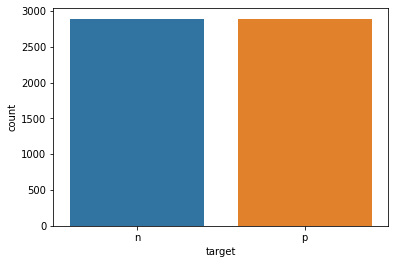

In [34]:
# Resample data using smote
xtrain_smote, ytrain_smote = resampler.fit_resample(xtrain, ytrain)
sns.countplot(x=ytrain_smote)
plt.show()

#### A. Naive Bayes with SMOTE Technique

In [35]:
# create Naive Bayes model
model = MultinomialNB()
# Train the model
model.fit(xtrain_smote, ytrain_smote)

MultinomialNB()

In [36]:
# make prediction
ypred = model.predict(xtest)

In [37]:
# Compute the accuracy and confusion matrix
from sklearn import metrics
accuracy = metrics.accuracy_score(ytest, ypred)
print("Accuracy:%.2f\n\n"%(accuracy))
cm = metrics.confusion_matrix(ytest, ypred)
print("Confusion Matrix:")
print(cm, "\n\n")
print("-------------------------------------")
result = metrics.classification_report(ytest, ypred)
print("Classification Reort:\n",)
print(result)

Accuracy:0.30


Confusion Matrix:
[[254  14]
 [690  42]] 


-------------------------------------
Classification Reort:

              precision    recall  f1-score   support

           n       0.27      0.95      0.42       268
           p       0.75      0.06      0.11       732

    accuracy                           0.30      1000
   macro avg       0.51      0.50      0.26      1000
weighted avg       0.62      0.30      0.19      1000



#### B. Decision Tree Classifier using SMOTE

In [41]:
# Train Decision tree classifier using smote
dtc.fit(xtrain_smote, ytrain_smote)

DecisionTreeClassifier()

In [42]:
# make prediction
dtcpred = dtc.predict(xtest)

In [43]:
# Compute the accuracy and confusion matrix
from sklearn import metrics
accuracy = metrics.accuracy_score(ytest, dtcpred)
print("Accuracy:%.2f\n\n"%(accuracy))
cm = metrics.confusion_matrix(ytest, dtcpred)
print("Confusion Matrix:")
print(cm, "\n\n")
print("-------------------------------------")
result = metrics.classification_report(ytest, dtcpred)
print("Classification Reort:\n",)
print(result)

Accuracy:0.31


Confusion Matrix:
[[251  17]
 [669  63]] 


-------------------------------------
Classification Reort:

              precision    recall  f1-score   support

           n       0.27      0.94      0.42       268
           p       0.79      0.09      0.16       732

    accuracy                           0.31      1000
   macro avg       0.53      0.51      0.29      1000
weighted avg       0.65      0.31      0.23      1000



### Part Two: Sentiment Analysis

In [44]:
# import sentiment analyzer vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [45]:
#create sentiment analyzer model
sentiment = SentimentIntensityAnalyzer()

In [46]:
# load movie dataset
df1 = pd.read_csv("export_movie.csv")

In [47]:
# generate polarity scores for the reviews
df1["compound"] = [sentiment.polarity_scores(review)['compound'] for review in df1['reviews']]
df1["neg"] = [sentiment.polarity_scores(review)['neg'] for review in df1['reviews']]
df1["neu"] = [sentiment.polarity_scores(review)['neu'] for review in df1['reviews']]
df1["pos"] = [sentiment.polarity_scores(review)['pos'] for review in df1['reviews']]

In [48]:
df1.head(2)

,Unnamed: 0,asin,product name,ratings,reviews,helpful,date,Unnamed: 6,target,text,compound,neg,neu,pos
0,0,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,"\n\n When I purchased this set, there were 3 ...","1,322",19-Dec-17,NaN,p,"\n\n When I purchased this set, there were 3 ...",0.9165,0.040,0.895,0.065
1,1,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,\n\n I really wish Amazon kept all the review...,439,30-Dec-17,NaN,p,\n\n I really wish Amazon kept all the review...,0.9754,0.025,0.851,0.124


In [49]:
# get insights into sentiment scores for movie data
df1[["compound", "neg", "neu", "pos"]].describe()

,compound,neg,neu,pos
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.451505,0.045718,0.672823,0.279253
std,0.503084,0.082246,0.229478,0.245760
min,-0.968800,0.000000,0.000000,0.000000
25%,0.151100,0.000000,0.572000,0.095000
50%,0.624900,0.000000,0.724000,0.222000
75%,0.840200,0.070000,0.825000,0.399000
max,0.998800,1.000000,1.000000,1.000000


We can see that the median compound score is 0.62, which means that over 50% of the reviews have a compound score of more than 0.62, which suggest strong positive sentiment. Lets look at the distribution of the compound scores

#### Distribution of compound scores

<AxesSubplot:xlabel='compound', ylabel='Count'>

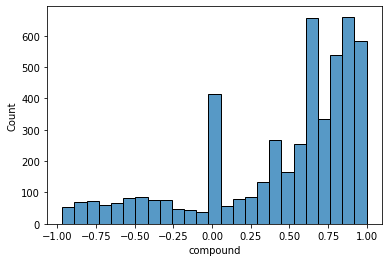

In [50]:
sns.histplot(df1["compound"])

#### Distribution of Positive scores

<AxesSubplot:xlabel='pos', ylabel='Count'>

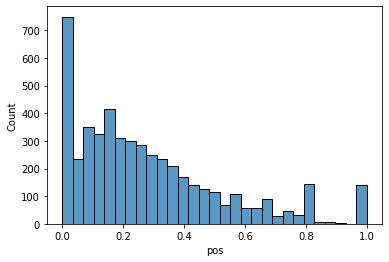

In [51]:
sns.histplot(df1["pos"])

#### Distribution of Negative scores

<AxesSubplot:xlabel='neg', ylabel='Count'>

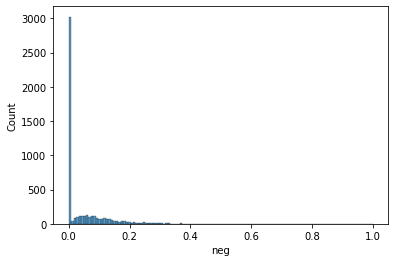

In [52]:
sns.histplot(df1["neg"])

In [53]:
# How many product do we have
df1["product name"].value_counts()

Harry Potter: The Complete 8-Film Collection    5000
Name: product name, dtype: int64

There is only one product, Harry Potter.

##### Question: How many negative reviews do we have for this product?

In [54]:
# Let look at the negative reviews we have for this product
(df1["compound"] <=0).groupby(df1["product name"]).sum()

product name
Harry Potter: The Complete 8-Film Collection    1149
Name: compound, dtype: int64

There are 1149 negative reviews out of 5000 reviews. This represent 23%

##### How many positive reviews do we have for this product?

In [55]:
# Let look at the negative reviews we have for this product
(df1["compound"] >0).groupby(df1["product name"]).sum()

product name
Harry Potter: The Complete 8-Film Collection    3851
Name: compound, dtype: int64

There is 3851 positive reviews

In [56]:
# preprocess the reviews columns
df1["processed_review"] = df1["reviews"].apply(preprocess_text)

In [57]:
df1_positive = df1.loc[(df1["compound"] >0),:]
df1_negative = df1.loc[(df1["compound"] <=0),:]
df1_positive.head()

,Unnamed: 0,asin,product name,ratings,reviews,helpful,date,Unnamed: 6,target,text,compound,neg,neu,pos,processed_review
0,0,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,"\n\n When I purchased this set, there were 3 ...","1,322",19-Dec-17,NaN,p,"\n\n When I purchased this set, there were 3 ...",0.9165,0.040,0.895,0.065,"[purchas, set, 3, option, harri, potter, 8, fi..."
1,1,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,\n\n I really wish Amazon kept all the review...,439,30-Dec-17,NaN,p,\n\n I really wish Amazon kept all the review...,0.9754,0.025,0.851,0.124,"[realli, wish, amazon, kept, review, separ, fo..."
2,2,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,3,\n\n *** UPDATE *** I returned this very disa...,358,16-Feb-18,NaN,n,\n\n *** UPDATE *** I returned this very disa...,0.8503,0.056,0.723,0.221,"[updat, return, disappoint, set, dvd', receiv,..."
3,3,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,5,"\n\n This review is about the set, not the mo...",292,26-Nov-17,NaN,p,"\n\n This review is about the set, not the mo...",0.9288,0.046,0.871,0.084,"[review, set, movi, either, like, harri, potte..."
5,5,B005OCFGTO,Harry Potter: The Complete 8-Film Collection,1,\n\n The discs in this ‘set’ are all very dif...,167,11-Jan-18,NaN,n,\n\n The discs in this ‘set’ are all very dif...,0.7176,0.039,0.830,0.131,"[disc, set, differ, look, like, took, disc, se..."


###### Visualize Negative reviews

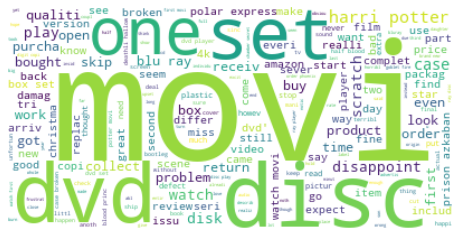

In [58]:
# wordcloud of words from negative reviews
neg_tokens = [word for review in df1_negative["processed_review"] for word in review]
neg_wordcloud = WordCloud(background_color="white").generate_from_text(' '.join(neg_tokens))

#Display the generated image
plt.figure(figsize=(8,8))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Some of the common negative words are disc, order, blu ray, qualiti, box, return, skip, problem, stop, disappoint, damag, broken, differ, case etc. 

Looking at the common words one can deduce that some of the users were disappointed, some even skip etc.

##### Visualize Positive reviews

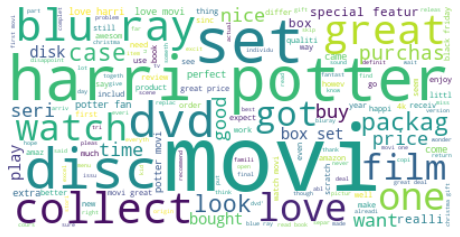

In [59]:
# Wordcloud of words from positive reviews 
pos_tokens = [word for review in df1_positive["processed_review"] for word in review]
pos_wordcloud = WordCloud(background_color="white").generate_from_text(' '.join(pos_tokens))

# Display the generated image
plt.figure(figsize=(8,8))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Some of the common positive words are love, great, set, look, buy, nice, potter, harri, movi, disc, collect, watch, want, play, good, extra, special etc.

From the positive common words, one can deduce that some customers feel nice watching the movie, some love the movie.

In [60]:
# Use the nltk freqDist and then tabulate
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

   movi     set   great    love  potter   harri    disc   watch     dvd collect 
   2696    1528    1449    1171    1125    1080    1046     827     801     787 


The top 10 positive words are movi, set, great, love, potter, harri, disc, watch, dvd, and collect

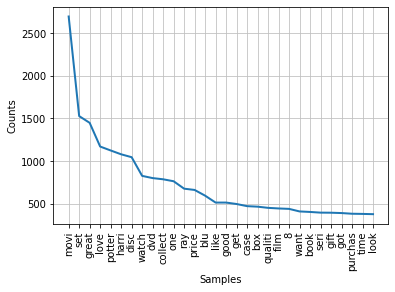

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [61]:
# visualize the most frequent positive words
pos_freqdist.plot(30)

In [62]:
# use the nltk freqDist and then tabulate
neq_freqdist = FreqDist(neg_tokens)
neq_freqdist.tabulate(10)

  movi   disc    dvd    set  watch potter  harri    one   case   play 
   650    438    384    359    250    206    204    198    193    171 


The top 10 most frequent negative words are movi, disc, dvd, set, watch, potter, harri, one, case, and play

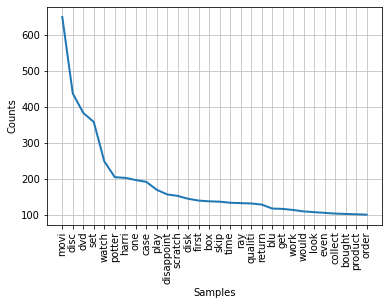

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [63]:
# visualize the most frequent negative words
neq_freqdist.plot(30)